In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [2]:
#Creates empty array for x, y, and z value of hits
darrell_arr = np.dtype({"names": ['x_value', 'y_value','z_value'], "formats": [np.float32, np.float32, np.float32]})
xlist = []
ylist = []
zlist = []

In [3]:
#Opens sim file
data = open('FullConcreteModel.inc2.id1.sim', 'r')
counter = 1
#Starts tallies in detector at 0
c = 0
for l in data:
    #counter = counter + 1
    #print(line)
    #print(type(line))
    line = cleanlines(l.strip('\n'))
    if len(line) > 1 and line[0][2:6] == 'BLAK':
        #print(line)
        c +=1
        #Tallies coordinates of hits
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
    #if counter > 10000:
       # break
data.close()

In [4]:
print(c)

useful_arr = np.zeros(len(xlist), darrell_arr)
useful_arr['x_value'] = xlist
useful_arr['y_value'] = ylist
useful_arr['z_value'] = zlist
useful_arr[:10]

1782272


array([( 749.6815 ,   21.85497, 155.00739),
       ( 632.22394, -403.47604, 183.40178),
       (-486.43625,  570.8588 , 277.82318),
       ( 439.57828,  607.6767 , 186.42738),
       ( 749.7814 ,   18.10839,  56.0451 ),
       (-714.5104 , -227.98001, 255.60233),
       ( 736.2063 , -143.17912, 333.73544),
       (-697.2061 , -276.41202, 591.18304),
       (-685.2822 ,  304.77582, 429.9304 ),
       (-211.38107,  719.59576, 813.096  )],
      dtype=[('x_value', '<f4'), ('y_value', '<f4'), ('z_value', '<f4')])

In [5]:
#Generates phi -180 to 180 degrees
phi = np.arctan2(useful_arr['y_value'],useful_arr['x_value'])*180/np.pi
phi[:10]

array([   1.6698331,  -32.545418 ,  130.43474  ,   54.11895  ,
          1.3835136, -162.30359  ,  -11.005633 , -158.37383  ,
        156.02313  ,  106.37013  ], dtype=float32)

In [6]:
#Coverts phi degrees into cm
x = phi*np.pi*750/180
x[:10]

array([   21.858065,  -426.01852 ,  1707.3868  ,   708.4154  ,
          18.11015 , -2124.549   ,  -144.06342 , -2073.1084  ,
        2042.338   ,  1392.3817  ], dtype=float32)

In [7]:
#Confirms constant r of 750 cm
r = np.sqrt(useful_arr['x_value']**2+useful_arr['y_value']**2)
r[:10]

array([750.     , 750.     , 750.     , 750.     , 750.00006, 749.99994,
       749.99994, 750.     , 750.     , 750.     ], dtype=float32)

In [8]:
z = useful_arr['z_value']
z[:10]

array([155.00739, 183.40178, 277.82318, 186.42738,  56.0451 , 255.60233,
       333.73544, 591.18304, 429.9304 , 813.096  ], dtype=float32)

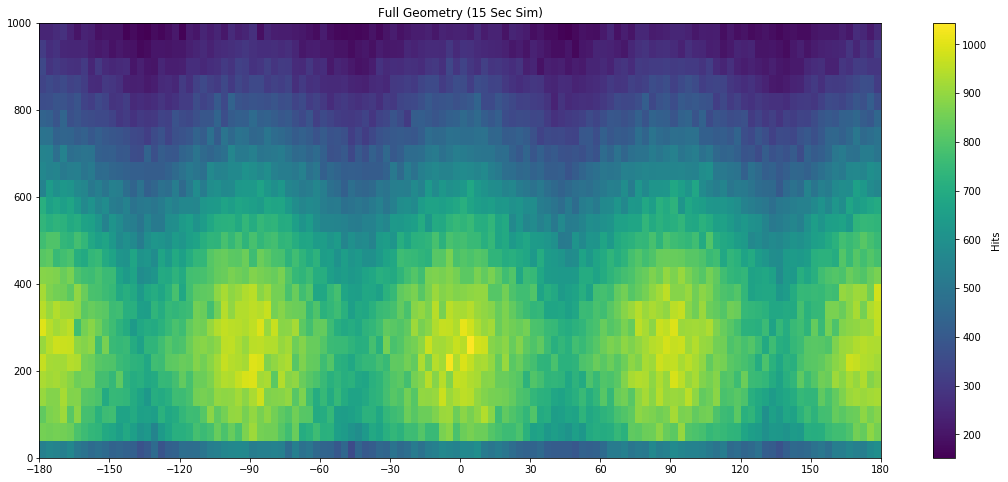

In [9]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap, _, __ = np.histogram2d(phi,useful_arr['z_value'], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Full Geometry')
plt.savefig('Full_15.png')
plt.show()

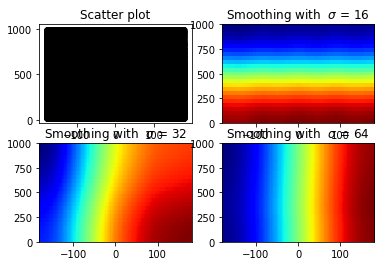

In [10]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(phi,z, s, bins=[xedges, yedges]):
    heatmap, _, __ = np.histogram2d(phi,z, bins=[xedges, yedges])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)


sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(phi,z, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(phi,z, s)
        ax.imshow(img, extent=extent, origin='lower',aspect='auto', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()


In [ ]:
heatmap?